## Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement

In [ ]:
Problem Statement:
    To predict whether the patient has heart disease or not by using required features.
    
Features:
    'age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
    'exng', 'oldpeak', 'slp', 'caa', 'thall'

### 2. Data Gathering

#### Loading data 

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### 3. Exploratory Data Analysis and Feature Engineering

In [ ]:
1. Missing values
2. Outliers
3. Encoding

#### Dataset Information

In [8]:
# here we get all information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### 1. Duplicate values

In [5]:
# check duplicates
df.duplicated().sum()

1

#### Dataset holds the 1 duplicate entry

In [6]:
# Drop duplicate entry
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(302, 14)

### 2. Missing values/Null values

In [9]:
# checking missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### No missing value found

### 3. Dataset Describe

In [10]:
# check statistical measures about the data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 3.1 cp

In [11]:
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

#### 3.2 fbs

In [12]:
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

#### 3.3 restecg

In [13]:
df['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

#### 3.4 exng

In [14]:
df['exng'].value_counts()

0    203
1     99
Name: exng, dtype: int64

#### 3.5 slp

In [15]:
df['slp'].value_counts()

2    141
1    140
0     21
Name: slp, dtype: int64

#### 3.6 caa

In [16]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

#### 3.7 output

In [17]:
# checking the distribution of Target Variable
df['output'].value_counts()   # here data is inbalance

1    164
0    138
Name: output, dtype: int64

In [18]:
164/302

0.543046357615894

In [19]:
138/302

0.45695364238410596

<AxesSubplot:xlabel='output', ylabel='count'>

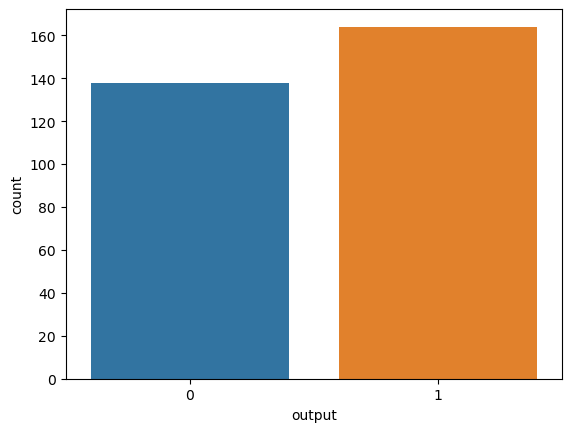

In [20]:
sns.countplot(x = df['output']) 

### 4. Feature Selection

In [ ]:
Filter Method:
    1. VIF

Wrapper Method:
    1. Forward Feature Selection
    2. Backward Feature Elimination
    3. RFE

Embedded Method:
    1. Regularization

#### No multicolinearity

In [21]:
x = df.drop('output', axis = 1)
y = df['output']

In [22]:
vif_value = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_value.append(vif)
    
vif_val = pd.Series(vif_value, index = x.columns)
vif_val

age         39.567644
sex          3.507112
cp           2.409980
trtbps      58.776923
chol        26.281421
fbs          1.273256
restecg      2.051037
thalachh    42.631809
exng         2.022825
oldpeak      3.071361
slp         10.015857
caa          1.860512
thall       17.141073
dtype: float64

### 5. Model Training

#### 5.1 Spliting the Data into Training data and Testing data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [24]:
y_train.value_counts()

1    131
0    110
Name: output, dtype: int64

In [25]:
131/241

0.5435684647302904

#### 5.2 Instatiating Model and Training the model

In [26]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

### Checking Linearity 

In [27]:
p = logistic_clf.predict_proba(x_train)[:,1]

In [21]:
# checking correlation between independent variables and Log odds
x_train['Log_Odds'] = np.log(p/(1-p))
x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Log_Odds
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,-4.670237
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,-0.234297
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1.385079
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,4.454944
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1.207960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,3.294652
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,0.640449
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1.430168
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0.103494


In [22]:
x_train.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Log_Odds
age,1.000000,-0.122651,-0.057047,0.256528,0.192829,0.120029,-0.074226,-0.418260,0.127397,0.240524,-0.191981,0.294969,0.077203,-0.293874
sex,-0.122651,1.000000,-0.058051,-0.060399,-0.180206,0.069490,-0.007247,-0.065789,0.144817,0.094324,-0.049958,0.115101,0.216504,-0.371190
cp,-0.057047,-0.058051,1.000000,0.013622,-0.060637,0.119544,0.051296,0.262639,-0.447927,-0.176467,0.134336,-0.185332,-0.189286,0.620605
trtbps,0.256528,-0.060399,0.013622,1.000000,0.105414,0.205747,-0.111141,-0.032860,0.062461,0.187722,-0.121805,0.134392,0.063249,-0.218820
chol,0.192829,-0.180206,-0.060637,0.105414,1.000000,-0.018184,-0.159492,0.009239,0.130485,0.040286,0.010698,0.067102,0.108335,-0.089060
fbs,0.120029,0.069490,0.119544,0.205747,-0.018184,1.000000,-0.057192,0.015305,0.037440,0.013430,-0.073508,0.074348,-0.048828,-0.014646
restecg,-0.074226,-0.007247,0.051296,-0.111141,-0.159492,-0.057192,1.000000,-0.000890,-0.098262,-0.076149,0.107609,-0.085536,0.038405,0.156019
thalachh,-0.418260,-0.065789,0.262639,-0.032860,0.009239,0.015305,-0.000890,1.000000,-0.368727,-0.333413,0.387568,-0.222874,-0.091053,0.598692
exng,0.127397,0.144817,-0.447927,0.062461,0.130485,0.037440,-0.098262,-0.368727,1.000000,0.252893,-0.260176,0.139510,0.181055,-0.559841
oldpeak,0.240524,0.094324,-0.176467,0.187722,0.040286,0.013430,-0.076149,-0.333413,0.252893,1.000000,-0.542941,0.263902,0.251635,-0.622958


### 6. Model Evaluation

#### 6.1 Model Evaluation on Training Data

In [28]:
# Evaluation on Training Data

y_pred_train = logistic_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy of model :", accuracy)
print("*"*50)

area_under_curve = roc_auc_score(y_train, y_pred_train)
print("Area under curve :", area_under_curve)

Confusion Matrix :
 [[ 86  24]
 [ 10 121]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       110
           1       0.83      0.92      0.88       131

    accuracy                           0.86       241
   macro avg       0.87      0.85      0.86       241
weighted avg       0.86      0.86      0.86       241

**************************************************
Accuracy of model : 0.8589211618257261
**************************************************
Area under curve : 0.8527411519777933


In [ ]:
                 Pred Val
                  N     P
    Act Val  N    86    24   >> 110   # here misclassification is in class0
             P    10    121  >> 131    

#### Positive class

In [29]:
TN = 86
TP = 121
FP = 24
FN = 10

In [30]:
Recall = TP/(TP + FN)
Recall

0.9236641221374046

In [31]:
Precision = TP/(TP  + FP)
Precision

0.8344827586206897

In [32]:
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
F1_Score

0.8768115942028986

In [33]:
TPR = TP/(TP+FN)
TPR

0.9236641221374046

In [34]:
FPR = FP/(FP+TN)
FPR

0.21818181818181817

#### Negative class

In [35]:
Precision = TN/(TN + FN)
Precision

0.8958333333333334

In [36]:
Recall = TN/(TN + FP)
Recall

0.7818181818181819

In [37]:
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
F1_Score

0.8349514563106797

#### Weighted avg

In [ ]:
>> when our data is imbalance then go for weighted avg

#### Weighted avg for precision

In [38]:
0.90 * (110/241) + 0.83 * (131/241)

0.8619502074688796

#### Weighted avg for recall

In [39]:
0.78 * (110/241) + 0.92 * (131/241)

0.8560995850622406

#### Weighted avg for f1score

In [40]:
0.83 * (110/241) + 0.88 * (131/241)

0.8571784232365145

#### 6.2 Model Evaluation on Testing Data

In [41]:
# Evaluation on Testing Data

y_pred = logistic_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model :", accuracy)
print("*"*50)

area_under_curve = roc_auc_score(y_test, y_pred)
print("Area under curve :", area_under_curve)

Confusion Matrix :
 [[22  6]
 [ 3 30]]
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

**************************************************
Accuracy of model : 0.8524590163934426
**************************************************
Area under curve : 0.8474025974025974


In [42]:
TN = 22
TP = 30
FP = 6
FN = 3

In [43]:
TPR = TP/(TP+FN)
TPR

0.9090909090909091

In [44]:
FPR = FP/(FP+TN)
FPR

0.21428571428571427

### ROC Curve

In [45]:
# for roc curve we want probability
y_pred_train_prob = logistic_clf.predict_proba(x_train)

In [46]:
y_pred[25:30]

array([1, 1, 1, 0, 0], dtype=int64)

In [47]:
y_pred_train_prob[25:30]

array([[0.12356478, 0.87643522],
       [0.29776836, 0.70223164],
       [0.09539755, 0.90460245],
       [0.09895859, 0.90104141],
       [0.02175739, 0.97824261]])

In [ ]:
# class1    >> pred class

# default threshold == 0.5

0.87643522  >> class 1
0.70223164  >> class 1
0.90460245  >> class 1
0.90104141  >> class 1
0.97824261  >> class 1

y_pred_train = [1 1 1 1 1]    # y_pred_train should be equal to y_pred_train_prob

In [48]:
y_pred_train[25:30]

array([1, 1, 1, 1, 1], dtype=int64)

In [49]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_train_prob[:,1])
fpr

array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
       0.01818182, 0.01818182, 0.02727273, 0.02727273, 0.03636364,
       0.03636364, 0.04545455, 0.04545455, 0.05454545, 0.05454545,
       0.06363636, 0.06363636, 0.07272727, 0.07272727, 0.10909091,
       0.10909091, 0.11818182, 0.11818182, 0.12727273, 0.12727273,
       0.16363636, 0.16363636, 0.19090909, 0.19090909, 0.2       ,
       0.2       , 0.21818182, 0.21818182, 0.22727273, 0.22727273,
       0.25454545, 0.25454545, 0.26363636, 0.26363636, 0.27272727,
       0.27272727, 0.43636364, 0.43636364, 0.46363636, 0.46363636,
       0.55454545, 0.55454545, 0.61818182, 0.61818182, 0.66363636,
       0.66363636, 1.        ])

In [50]:
tpr

array([0.        , 0.00763359, 0.19847328, 0.19847328, 0.26717557,
       0.26717557, 0.40458015, 0.40458015, 0.41221374, 0.41221374,
       0.45038168, 0.45038168, 0.49618321, 0.49618321, 0.57251908,
       0.57251908, 0.6870229 , 0.6870229 , 0.72519084, 0.72519084,
       0.81679389, 0.81679389, 0.88549618, 0.88549618, 0.89312977,
       0.89312977, 0.90076336, 0.90076336, 0.90839695, 0.90839695,
       0.91603053, 0.91603053, 0.92366412, 0.92366412, 0.93129771,
       0.93129771, 0.9389313 , 0.9389313 , 0.94656489, 0.94656489,
       0.95419847, 0.95419847, 0.96946565, 0.96946565, 0.97709924,
       0.97709924, 0.98473282, 0.98473282, 0.99236641, 0.99236641,
       1.        , 1.        ])

In [51]:
tpr.shape

(52,)

In [52]:
thresh

array([1.99396439e+00, 9.93964387e-01, 9.49603472e-01, 9.45738866e-01,
       9.28105777e-01, 9.27920619e-01, 9.01041414e-01, 8.99679393e-01,
       8.99396210e-01, 8.94629849e-01, 8.78236452e-01, 8.76435220e-01,
       8.56946920e-01, 8.52529900e-01, 8.18866576e-01, 8.14261466e-01,
       7.49790273e-01, 7.41750918e-01, 7.14932890e-01, 7.02231639e-01,
       6.62619486e-01, 6.61044126e-01, 6.02526133e-01, 6.01426017e-01,
       6.00674582e-01, 5.79221233e-01, 5.62667792e-01, 5.47077585e-01,
       5.37402279e-01, 5.34915918e-01, 5.28119552e-01, 5.15749509e-01,
       5.15510696e-01, 4.90886054e-01, 4.85445652e-01, 4.55039430e-01,
       4.41692341e-01, 4.39329541e-01, 4.35050410e-01, 4.20436979e-01,
       3.92290725e-01, 1.68404986e-01, 1.61428760e-01, 1.31919618e-01,
       1.31247636e-01, 8.96779358e-02, 8.45463496e-02, 6.96582282e-02,
       5.85346619e-02, 4.18192508e-02, 4.05649750e-02, 1.64379984e-03])

In [53]:
thresh.shape   # here we have 66 threshold

(52,)

In [ ]:
NOTE:
>> if we are changing fpr & tpr then threshold also changes at that stage.

In [54]:
# here we find 0.5 thresh index

np.where(np.around(thresh,2) == 0.49)

(array([33, 34], dtype=int64),)

In [55]:
thresh[33]

0.490886053911827

In [56]:
# here we find tpr at 0.5 thresh
tpr[33]

0.9236641221374046

In [57]:
# here we find tpr at 0.5 thresh
fpr[33]

0.22727272727272727

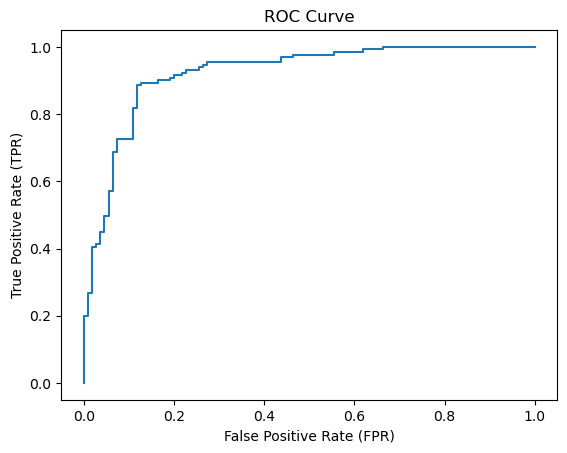

In [58]:
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.savefig("ROC_Curve.png")

In [63]:
import plotly.express as px
px.scatter(x = fpr, y = tpr)

In [64]:
y = 0.9770

In [65]:
tpr
np.where(tpr> y)

(array([44, 45, 46, 47, 48, 49, 50, 51], dtype=int64),)

In [66]:
tpr[44]

0.9770992366412213

In [67]:
fpr[44]

0.4636363636363636

In [68]:
thresh[44]

0.1312476355069212

In [ ]:
NOTE:
>> at 0.13 thresh we get best recall(tpr), so we use this thresh value

### Evaluation Result

In [ ]:
>> Model is best model, as we get precision value 0.83 on training data set as well as 0.83 on 
  testing data set.
>> So, model is low bias and low variance

### Single row testing

In [69]:
y_pred_train_prob[:,1][0]

0.009283068794147451

In [70]:
def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "The Patient has Heart Disease"
    else:
        return "The Patient does not have a Heart Disease"
    
threshold = thresh[44]    # 0.13

pred_class = get_pred_class(threshold, y_pred_train_prob[:,1][0])
print("Predict the Patient has Heart Disease or not :",pred_class)

Predicted prob is : 0.009283068794147451
Predict the Patient has Heart Disease or not : The Patient does not have a Heart Disease


In [71]:
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

### For User

In [72]:
column_names = x.columns.tolist()
column_names

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [73]:
age = 37
sex = 1
cp = 2
trtbps = 130
chol = 250
fbs = 0
restecg = 1
thalachh = 187
exng = 0
oldpeak = 3.5
slp = 0
caa = 0
thall = 2


def get_pred_class(threshold, pred_prob):
    print("Predicted prob is :",pred_prob)
    if pred_prob >= threshold:
        return "The Patient has Heart Disease"
    else:
        return "The Patient does not have a Heart Disease"
    
threshold = thresh[44]    # 0.13

test_array = np.array([age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, 
                       oldpeak, slp, caa, thall], ndmin = 2)

pred_prob = logistic_clf.predict_proba(test_array)[0,1]

pred_class = get_pred_class(threshold, pred_prob)
print("Predict the Patient has Heart Disease or not :",pred_class)

Predicted prob is : 0.6999030100464122
Predict the Patient has Heart Disease or not : The Patient has Heart Disease


In [74]:
import pickle 

with open('Heart_Disease.pkl','wb') as f:
    pickle.dump(logistic_clf, f)